In [8]:
import pandas as pd
from data_presenter import DataPresenter
from storage import Storage
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [58]:
engine = create_engine("sqlite:///projects.db", echo=True)
storage = Storage()
projects = storage.read_all(engine)
dp = DataPresenter()
df = dp.scalars_to_df(projects)
df.head()

2023-04-25 07:39:52,833 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-04-25 07:39:52,837 INFO sqlalchemy.engine.Engine SELECT projects.id, projects.title, projects.url, projects.description, projects.posted_date, projects.deadline, projects.expected_time_limit, projects.price_fixed, projects.price_fixed_min, projects.price_hourly, projects.price_hourly_min 
FROM projects
2023-04-25 07:39:52,838 INFO sqlalchemy.engine.Engine [generated in 0.00158s] ()
2023-04-25 07:39:52,842 INFO sqlalchemy.engine.Engine SELECT tags.id AS tags_id, tags.name AS tags_name, tags.project_id AS tags_project_id 
FROM tags 
WHERE ? = tags.project_id
2023-04-25 07:39:52,845 INFO sqlalchemy.engine.Engine [generated in 0.00408s] (1,)
2023-04-25 07:39:52,850 INFO sqlalchemy.engine.Engine SELECT tags.id AS tags_id, tags.name AS tags_name, tags.project_id AS tags_project_id 
FROM tags 
WHERE ? = tags.project_id
2023-04-25 07:39:52,851 INFO sqlalchemy.engine.Engine [cached since 0.009913s ago] (2,)
2023-04-25 0

,tag,title,url,description,posted_date,deadline,expected_time_limit,price_fixed,price_fixed_min,price_hourly,price_hourly_min
0,نرم افزار,یادگیری تقویتی عمیق با متلب,https://www.karlancer.com/projects/%DB%8C%D8%A...,یک سیستم الکترونیک قدرت مثل سیستم باک دارم که ...,None,None,15,10000000.0,None,None,None
1,python,یادگیری تقویتی عمیق با متلب,https://www.karlancer.com/projects/%DB%8C%D8%A...,یک سیستم الکترونیک قدرت مثل سیستم باک دارم که ...,None,None,15,10000000.0,None,None,None
2,tensorflow,یادگیری تقویتی عمیق با متلب,https://www.karlancer.com/projects/%DB%8C%D8%A...,یک سیستم الکترونیک قدرت مثل سیستم باک دارم که ...,None,None,15,10000000.0,None,None,None
3,pytorch,یادگیری تقویتی عمیق با متلب,https://www.karlancer.com/projects/%DB%8C%D8%A...,یک سیستم الکترونیک قدرت مثل سیستم باک دارم که ...,None,None,15,10000000.0,None,None,None
4,deep learning,یادگیری تقویتی عمیق با متلب,https://www.karlancer.com/projects/%DB%8C%D8%A...,یک سیستم الکترونیک قدرت مثل سیستم باک دارم که ...,None,None,15,10000000.0,None,None,None


In [74]:
x = df.tag.groupby(df.tag).any()
print(type(x))
x.index


<class 'pandas.core.series.Series'>


Index(['bigquery', 'deep learning', 'image processing', 'machine learning',
       'python', 'pytorch', 'tensorflow', 'برنامه نویسی', 'برنامه نویسی r',
       'برنامه نویسی وب', 'تنسورفلو', 'زبان برنامه نویسی SQL', 'نرم افزار',
       'هوش مصنوعی', 'پایتون', 'پردازش تصویر', 'یادگیری عمیق'],
      dtype='object', name='tag')

In [46]:
y = df.tag.groupby(df.tag).count()
print(type(y))


<class 'pandas.core.series.Series'>


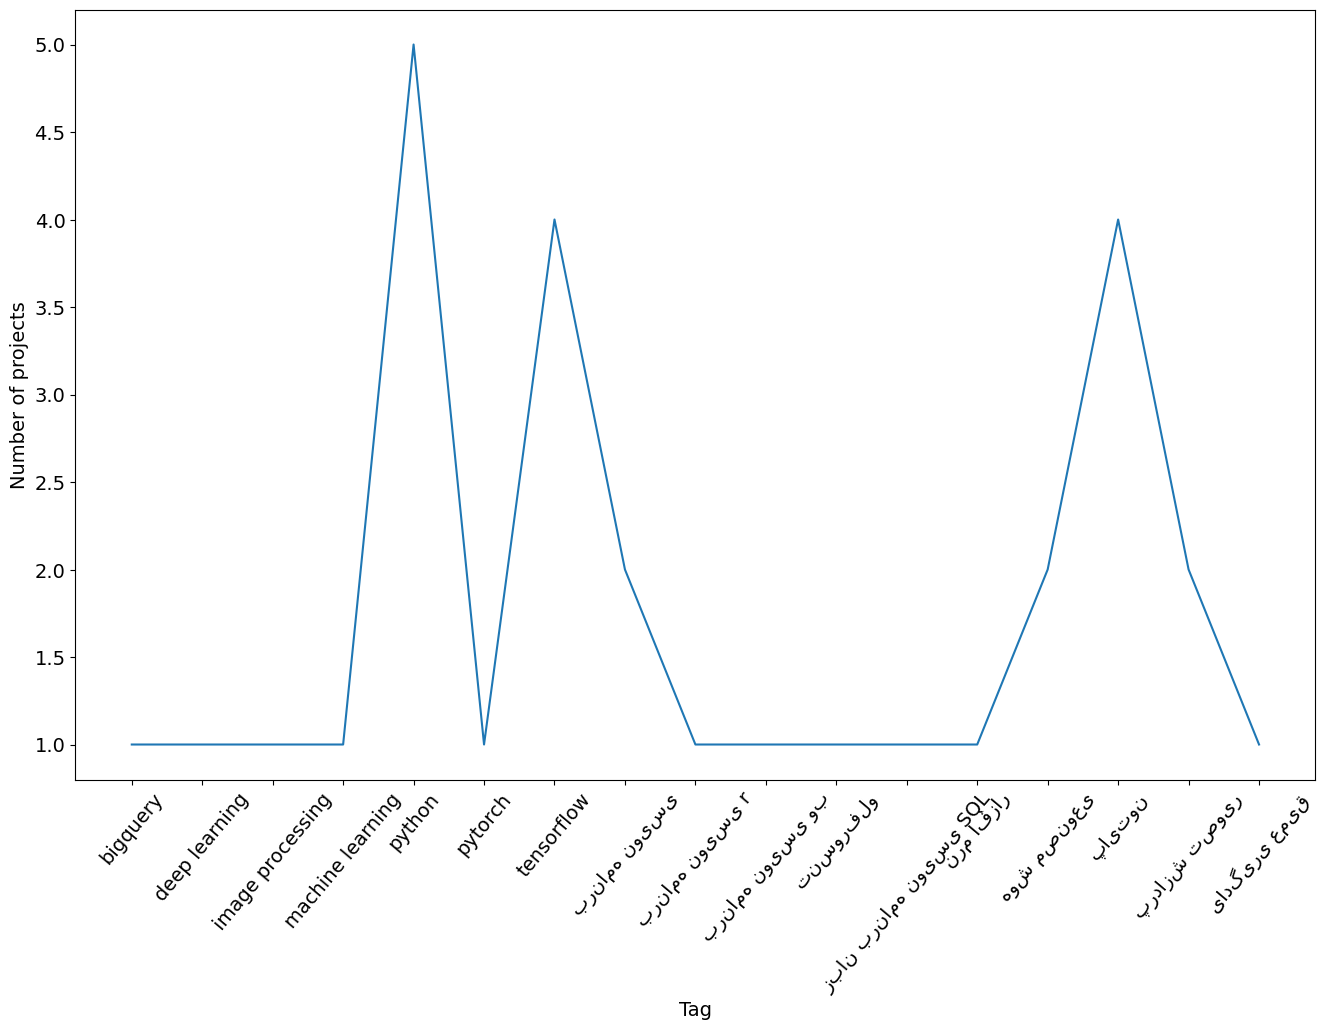

In [83]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14,rotation=50)
plt.yticks(fontsize=14)
plt.xlabel('Tag', fontsize=14)
plt.ylabel('Number of projects', fontsize=14)

plt.plot(x.index, y)
